# AND-NOT Gate

### Import Packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Implementing helper functions

1. Sigmoid activation function.

In [15]:
def sigmoid(z):
    
    s = 1 / (1 + np.exp(-z))
    
    return s

2. Initializer function which initializes weights and biases. 

In [16]:
def initialize_with_zeros(dim):

    w = np.zeros(shape=(dim, 1))
    b = 0

    return w, b

### Building the model Block by Block

1. predict function which calculates the final prediction

In [17]:
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    Y_prediction = (A > 0.5) * 1
    

    return Y_prediction

2. Propagate function which does the forward propagation step, calculates the cost and the gradients

In [18]:
def propagate(w, b, X, y):

    m = X.shape[0]

    A = sigmoid(np.dot(w.T,X) + b)   
    cost = (- 1 / m) * np.sum(y * np.log(A) + (1 - y) * (np.log(1 - A)))     
    
    dw = (1 / m) * np.dot(X, (A - y).T)
    db = (1 / m) * np.sum(A - y)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

3. optimize function which runs the gradient descent algorithm for a number of iterations, prints the cost after every 100 iterations.

In [19]:
def optimize(w, b, X, y, iterations, alpha):
    
    costs = []
    
    for i in range(iterations):
        
        grads, cost = propagate(w, b, X, y)
        
        dw = grads["dw"]
        db = grads["db"]
        

        w = w - alpha * dw
        b = b - alpha * db

        if i % 100 == 0:
            costs.append(cost)
        
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

4. model function which is the whole model put together and uses all the functions above.

In [20]:
def model(X_train, Y_train, X_test, Y_test, iterations, alpha):

    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, iterations, alpha)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": iterations}
    
    return d

### Trainning the model

In [21]:
# Creating train and test sets

X_train = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
Y_train = np.array([0, 0, 1, 0])

X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_test = np.array([0, 0, 1, 0])

In [22]:
# Feeding the data into model

d = model(X_train.T, Y_train, X_test.T, Y_test, iterations = 1000, alpha = 0.2)

Cost after iteration 0: 1.386294
Cost after iteration 100: 0.353958
Cost after iteration 200: 0.209670
Cost after iteration 300: 0.147589
Cost after iteration 400: 0.113293
Cost after iteration 500: 0.091672
Cost after iteration 600: 0.076851
Cost after iteration 700: 0.066085
Cost after iteration 800: 0.057923
Cost after iteration 900: 0.051530
train accuracy: 100.0 %
test accuracy: 100.0 %


### Plotting the result

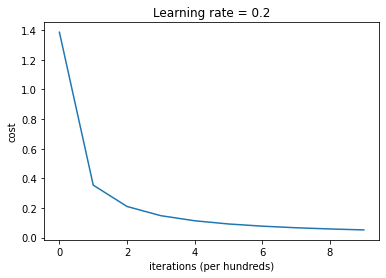

In [23]:
# Plotting the learning curve.

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

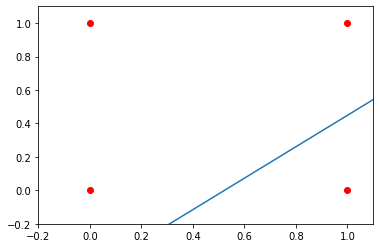

In [24]:
# Plotting the decision boundary.

plt.plot(X_train[:,0],X_train[:,1], 'ro')
plt.axis([-0.2, 1.1, -0.2, 1.1])


w = d['w']
b = d['b']

ax_x = np.linspace(-1, 2, 10)
ax_y = -(w[0] * ax_x + b) / w[1]

plt.plot(ax_x,ax_y)